In [35]:
%pylab inline
import pandas as pd
import os
import scipy.stats

import matplotlib
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42

# Paths
DATADIR="/storage/mgymrek/chipmunk/fig2_spikein"
OUTDIR=os.path.join(DATADIR, "pdfs")

FIG2COLOR = "darkblue"

Populating the interactive namespace from numpy and matplotlib


/usr/lib/python3.4/site-packages/IPython/core/magics/pylab.py:160: UserWarning: pylab import has clobbered these variables: ['colors', 'hist']
`%matplotlib` prevents importing * from pylab and numpy
  "\n`%matplotlib` prevents importing * from pylab and numpy"


In [46]:
# Load read counts
rcs = pd.read_csv(os.path.join(DATADIR, "chipmunk_spikein_readcounts.txt"), sep=" ", names=["spike", "reads","spikereads","targetreads"])
rcs

,spike,reads,spikereads,targetreads
0,0.10,1010174,22058,988155
1,0.25,349164,13148,336029
2,0.50,350168,12110,338071
3,0.80,351764,11493,340299
4,1.00,1009942,18746,991234


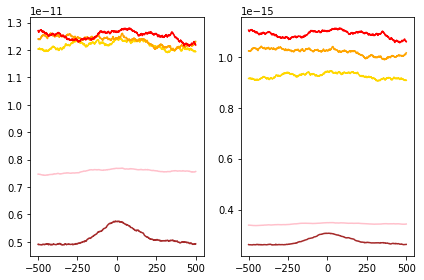

In [48]:
# Load Homer
def ParseCol(col):
    return "spike-"+col.split("/")[-1].replace("chipmunk_spikein_","").replace(" Coverage","").split("_")[0]

hist = pd.read_csv(os.path.join(DATADIR, "spikein_histograms.txt"), sep="\t")
hist.columns = ["dist"] + list(hist.columns)[1:]
hist = hist[[item for item in hist.columns if "Coverage" in item or "dist" in item]]
hist.columns = ["dist"] + [ParseCol(col) for col in list(hist.columns)[1:]]

# Normalize
scales = [0.1, 0.25, 0.5, 0.8, 1]
for scale in scales:
    numreads = rcs[rcs["spike"]==scale]["targetreads"].values[0]
    numspike = rcs[rcs["spike"]==scale]["spikereads"].values[0]
    hist["spike-%s-RPM"%scale] = hist["spike-%s"%scale]/numreads/1000000
    hist["spike-%s-RRPM"%scale] = hist["spike-%s"%scale]/numspike/numreads/1000000


# Plot
fig = plt.figure()
ax = fig.add_subplot(121)
i = 0
colors = ["pink", "gold", "orange", "red", "brown"]
for scale in scales:
    ax.plot(hist["dist"], hist["spike-%s-RPM"%scale], color=colors[i])
    i += 1
    
ax = fig.add_subplot(122)
i = 0
colors = ["pink", "gold", "orange", "red", "brown"]
for scale in scales:
    ax.plot(hist["dist"], hist["spike-%s-RRPM"%scale], color=colors[i])
    i += 1
    
fig.tight_layout()
#hist.head()